In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
import os

current_path = os.getcwd()

db_num = pd.read_csv('C:/projects/laboratory/Nanoparticle_cytotoxicity/databases/Final/numerical.csv')

db_cat = pd.read_csv('C:/projects/laboratory/Nanoparticle_cytotoxicity/databases/Final/categorical.csv')

y = db_num.loc[:, db_num.columns == 'viability (%)']
x_num = db_num.loc[:, db_num.columns != 'viability (%)']

sc = MinMaxScaler()
x_num = pd.DataFrame(sc.fit_transform(x_num),
                 columns=['del', 'time (hr)', 'concentration (ug/ml)', 'Hydrodynamic diameter (nm)', 'Zeta potential (mV)'])

del x_num['del']

In [6]:
compounds = list(db_cat['material'].unique())

In [7]:
# get smiles from formula

from pubchempy import get_compounds

smiles = []
for compound in compounds:
    for compound_obj in get_compounds(compound, 'name'):
        smiles.append(compound_obj.canonical_smiles)

In [12]:
from rdkit import Chem

descs = []

for one_smile in smiles:
    mol = Chem.MolFromSmiles(one_smile)
    descs_for_one_mol = None

    descs.append(descs_for_one_mol)

In [145]:
descs_df = pd.DataFrame(descs, columns=['MolWt', '2', '3', '4', '5'])
# descs_num = descs_df.select_dtypes(['number'])
# descs_num = descs_num.loc[:, (descs_num != 0).any(axis=0)]

In [146]:
descs_sorted = descs_df

names = descs_sorted.columns

sc = MinMaxScaler()
descs_sorted_norm = pd.DataFrame(sc.fit_transform(descs_sorted), columns=names)

In [147]:
descs_sorted = pd.concat([descs_sorted_norm, pd.DataFrame(compounds, columns=['material'])], axis=1)

In [148]:
descs_sorted

,MolWt,2,3,4,5,material
0,0.084188,0.899160,0.00,0.777778,0.230769,SiO2
1,0.384433,0.974586,0.00,0.857143,0.846154,Fe3O4
2,0.167869,0.000000,0.25,0.500000,0.134615,Ag
3,0.118829,0.909564,0.00,0.777778,0.230769,TiO2
4,0.323903,0.000000,0.25,0.500000,0.134615,Au
5,0.121498,0.896188,0.00,0.916667,0.076923,ZnO
6,0.320595,0.000000,0.00,0.500000,0.115385,Pt
7,0.118268,0.835996,0.25,0.916667,0.250000,CuO
8,0.280379,0.916995,0.00,0.777778,0.230769,CeO2
9,0.000000,0.000000,1.00,0.500000,0.000000,Co3O4


In [149]:
descs_sorted = descs_sorted.iloc[:20, :]

In [150]:
materials = db_cat['material']
db_cat.drop(['material'], axis=1)

encoder = ce.OrdinalEncoder(return_df=True)
x_cat = pd.DataFrame(encoder.fit_transform(db_cat))
del x_cat['Unnamed: 0']

In [151]:
x_cat_plus_mat = x_cat.assign(material=materials)

In [152]:
x = pd.concat([x_cat_plus_mat,x_num], axis=1)

In [153]:
x = pd.merge(x, descs_sorted)

x_y = pd.concat([x,y], axis=1)

In [154]:
x_y = x_y.dropna()
del x_y['material']

In [155]:
x_y

,cell tissue,cell source,test,Cell type,time (hr),concentration (ug/ml),Hydrodynamic diameter (nm),Zeta potential (mV),MolWt,2,3,4,5,viability (%)
0,1,1,1,1,0.106383,0.001219,0.209436,0.496341,0.084188,0.899160,0.0,0.777778,0.230769,113.670
1,1,1,1,1,0.106383,0.002437,0.209436,0.496341,0.084188,0.899160,0.0,0.777778,0.230769,97.265
2,1,1,1,1,0.106383,0.004875,0.209436,0.496341,0.084188,0.899160,0.0,0.777778,0.230769,108.730
3,1,1,1,1,0.106383,0.009750,0.209436,0.496341,0.084188,0.899160,0.0,0.777778,0.230769,98.451
4,1,1,1,1,0.106383,0.019500,0.209436,0.496341,0.084188,0.899160,0.0,0.777778,0.230769,98.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,31,10,19,89,0.489362,0.002000,0.106116,0.633740,1.000000,0.568477,0.0,0.333333,1.000000,87.000
3969,31,10,19,89,0.489362,0.001000,0.111383,0.633740,1.000000,0.568477,0.0,0.333333,1.000000,87.000
3970,31,10,19,89,0.489362,0.002000,0.111383,0.633740,1.000000,0.568477,0.0,0.333333,1.000000,87.000
3971,31,10,19,89,0.489362,0.015625,0.111383,0.633740,1.000000,0.568477,0.0,0.333333,1.000000,87.000


In [156]:
y = x_y.loc[:, 'viability (%)']
x = x_y.loc[:, x_y.columns != 'viability (%)']

bins = np.linspace(0, 4, 1)
y_binned = np.digitize(y, bins)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y_binned)

In [158]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, min_samples_leaf=1, criterion='absolute_error')

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

(-10.0, 250.0)

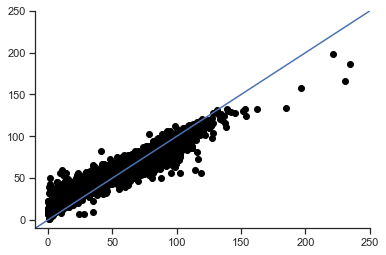

In [159]:
min = -10
max = 250

plt.plot(y_train, y1_pred, 'o', color='black')
plt.plot([min,max], [min,max])
plt.xlim(min,max)
plt.ylim(min,max)

Q2: 0.345340723062142
r2_test: 0.2751565399870787
MAE_test: 19.309483605334144
MSE_test: 715.9022744796151
RMSE_test: 26.75635017112041
r2_train: 0.8879891278940237
MAE_train: 7.0204958248526905
MSE_train: 100.70469358947601
RMSE_train: 10.035172823099561


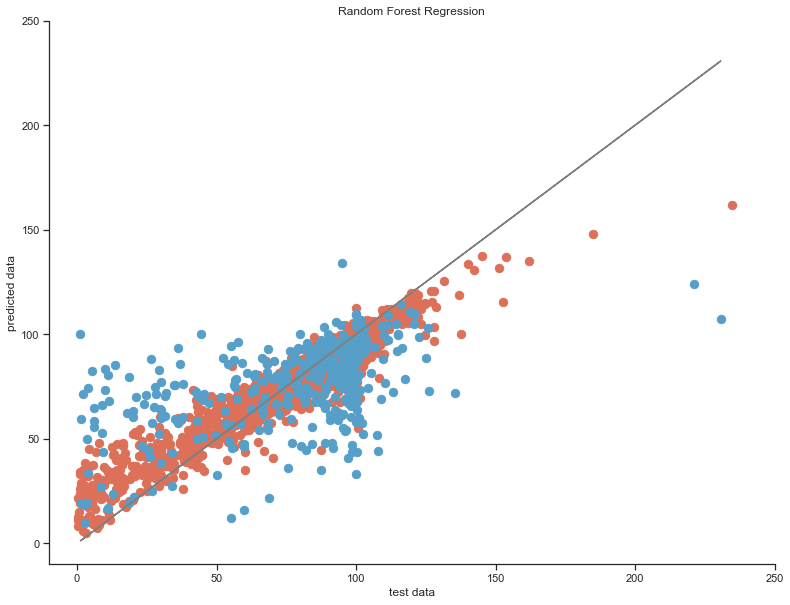

In [121]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10)
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(min,max)
plt.ylim(min,max)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def rfr_model(x, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(x, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, x, y, cv=10, 
                             scoring='neg_mean_absolute_error')

    return scores

predictions = cross_val_predict(rfr, x, y, cv=10)
accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.25, 1)
plt.ylim(0.25, 1)
plt.show()